<a href="https://colab.research.google.com/github/aaryaP777/Convolutional-Neural-Networks/blob/main/TF2_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()  #targets are 2D arrays
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [3]:
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [4]:
# build model using function API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [5]:
# compile and fit
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3573 - loss: 1.7461 - val_accuracy: 0.5405 - val_loss: 1.2551
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5304 - loss: 1.2920 - val_accuracy: 0.6078 - val_loss: 1.1057
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5888 - loss: 1.1480 - val_accuracy: 0.6299 - val_loss: 1.0216
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6244 - loss: 1.0444 - val_accuracy: 0.6505 - val_loss: 0.9809
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6570 - loss: 0.9589 - val_accuracy: 0.6717 - val_loss: 0.9176
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6765 - loss: 0.8990 - val_accuracy: 0.6818 - val_loss: 0.8985
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7016 - loss: 0.8347 - val_accuracy: 0.6848 - val_loss: 0.8911
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7151 - loss: 0.8010

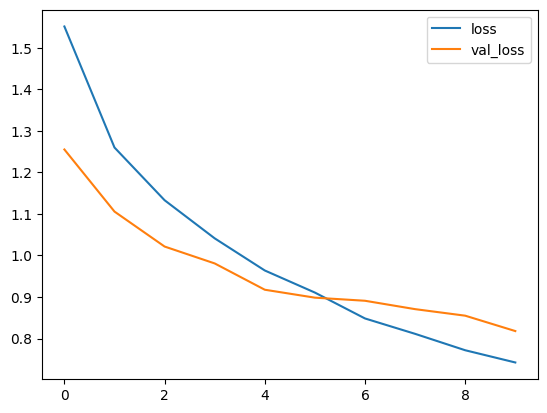

In [8]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

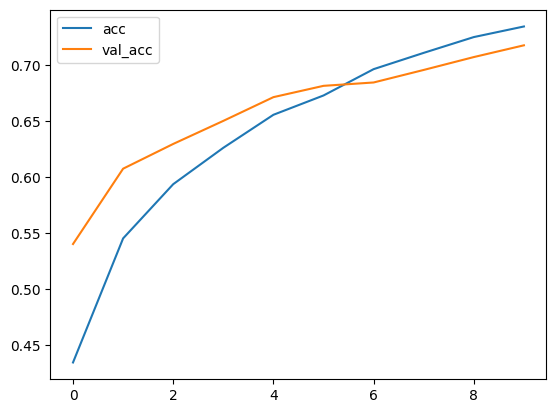

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Confusion matrix, without normalization
[[759  19  37   9  23   4  14  15  61  59]
 [  9 829   7   4   9   2  12   2  16 110]
 [ 72   5 582  43 110  76  64  30  11   7]
 [ 26   9  66 436  86 204  82  48  15  28]
 [ 16   3  55  41 697  52  42  81   8   5]
 [ 12   3  45 141  53 625  36  67   3  15]
 [ 11   6  41  35  50  27 806  14   7   3]
 [ 13   1  27  18  67  56   8 795   1  14]
 [ 48  37  14   7  13   6   7   4 832  32]
 [ 30  72   8   9   5   7   9  17  24 819]]


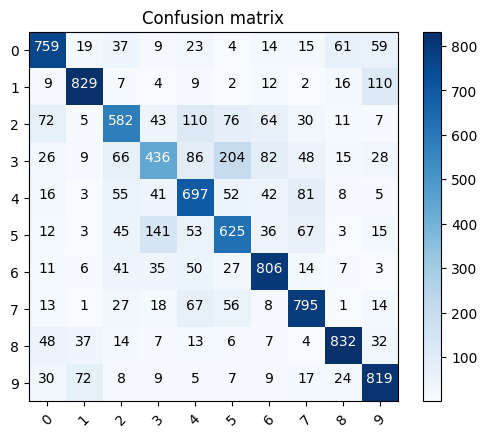

In [10]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
#label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

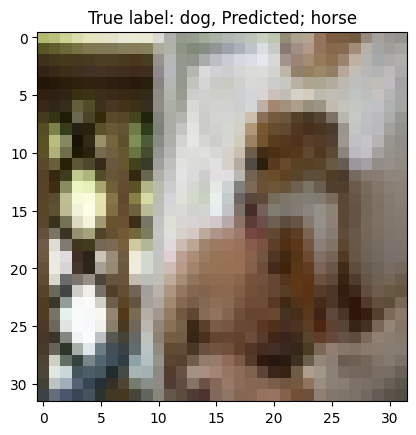

In [56]:
# misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted; %s" % (labels[y_test[i]], labels[p_test[i]]));

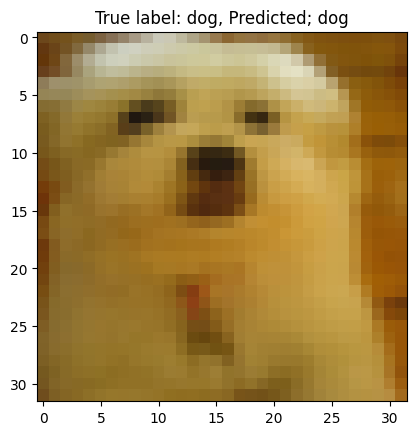

In [33]:
# correctly classified samples
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted; %s" % (labels[y_test[i]], labels[p_test[i]]));
